In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.3.1. Загрузка данных и первичный осмотр

In [2]:
df1 = pd.read_csv('datasets/S02-hw-dataset.csv')
display(df1.head())                     #Вывожу первые 5 строчек из загруженного датасета  
display(df1.info())                     #Вывожу информаци о столбцах и типах
display(df1.describe())                 #Вывоу базовые описательные статистики

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


None

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


2.3.2. Пропуски, дубликаты и базовый контроль качества

In [3]:
print(df1.isna().mean())          #Счёт доли пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [4]:
print(df1.duplicated().any())     #Поиск наличия хотя бы одной дублирующийся строки

True


In [5]:
df1_negative = df1['purchases'] < 0
df1n_age = (df1['age'] > 100) | (df1['age'] < 10)
df1n_revenue = (df1['purchases'] > 0) & (df1['revenue'] == 0)
df_strange = df1[df1_negative | df1n_age | df1n_revenue]
display(df_strange)

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0
20,21,5.0,RU,8,1488


df1_negative - пользователь может сделать 0 покупок и более, соответственно если в поле "-*" то значит данные некоректны 
df1n_age - Теоретически возраст покупателя может быть меньше 10 и больше 100, но скорее всего тут ошибка ввода
df1n_revenue - Если покупатель взял несколько товаров а заплатил 0 то значит что либо данные некорректные либо пользователь воришка 

На основе этих правил поиска подозрительных случаев:
5 пользователь имеет слишком большой возраст и количество покупок -1, 20й слишком малый а 10й не заплатил хотя покупки есть

2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [6]:
#1 Частотный анализ категориальной переменной (страны)
print('Распределение пользователей по странам')
display(df1['country'].value_counts())
#2 Группировка по странам с агрегацией суммы и среднего
print("\nСтатистика по странам:")
country_stats = df1.groupby('country')[['revenue', 'purchases']].agg(['sum', 'mean'])
display(country_stats)
#3 Создание возрастных групп bins и анализ по ним
bins = [0, 18, 30, 45, 60, 200]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels)
age_stats = df1.groupby('age_group', observed=False)[['revenue', 'purchases']].mean()
print('Средние показатели по возрастным группам:')
display(age_stats)

Распределение пользователей по странам


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Статистика по странам:


revenue              purchases          
            sum         mean       sum      mean
country                                         
CN         2108  1054.000000         9  4.500000
DE         8673  1445.500000        39  6.500000
FR         8111   675.916667        51  4.250000
RU        10271   790.076923        62  4.769231
US         4459   557.375000        37  4.625000

Средние показатели по возрастным группам:


,revenue,purchases
age_group,,
<18,1296.000000,6.000000
18-30,565.538462,4.461538
31-45,1108.214286,5.357143
46-60,605.777778,4.333333
60+,785.000000,-1.000000


Доминирующей категорией являются пользователи из Россиии. Средний чек наибольший в Германии, более чем в 2 раза превышающий чек в Франции и практически вдвое больше чем в Росссии. Аномалией явлется среднее кол-во покупок в возрастной группе старше 60 лет т.к ещё в прошлой задаче был обнаруже пользователь с аномальным кол-вом покупок (-1).

2.4 Визуализация данных в Matplotlib

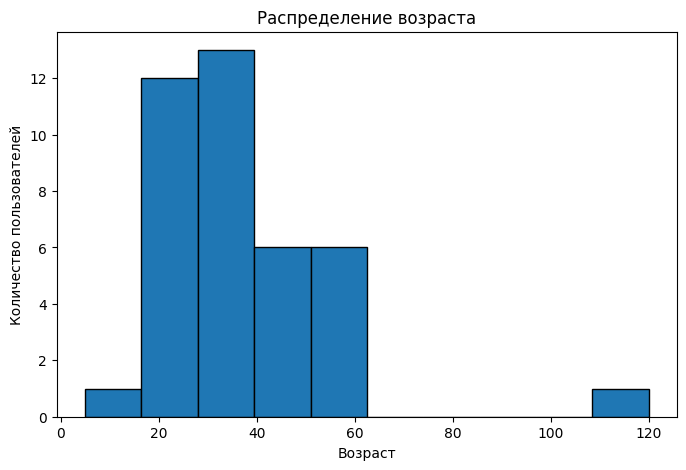

In [7]:
plt.figure(figsize=(8, 5))
age_clean = df1['age'].dropna()
plt.hist(age_clean, bins=10, edgecolor='black')

plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.savefig('figures/grafick1.png', dpi=300, bbox_inches='tight')
plt.show()   #Гистограмма возраста

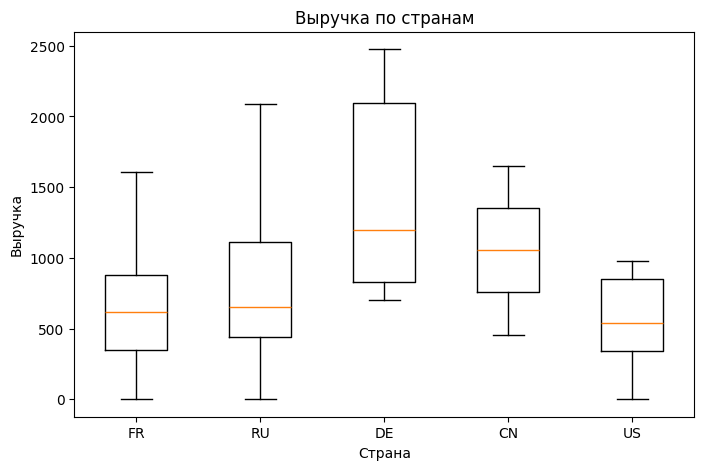

In [8]:
countries = df1['country'].unique()
data_by_country = [df1[df1['country'] == c]['revenue'] for c in countries]

plt.figure(figsize=(8, 5))
plt.boxplot(data_by_country, tick_labels=countries)

plt.title('Выручка по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.savefig('figures/grafick2.png', dpi=300, bbox_inches='tight')
plt.show() #боксплот выручки по странам

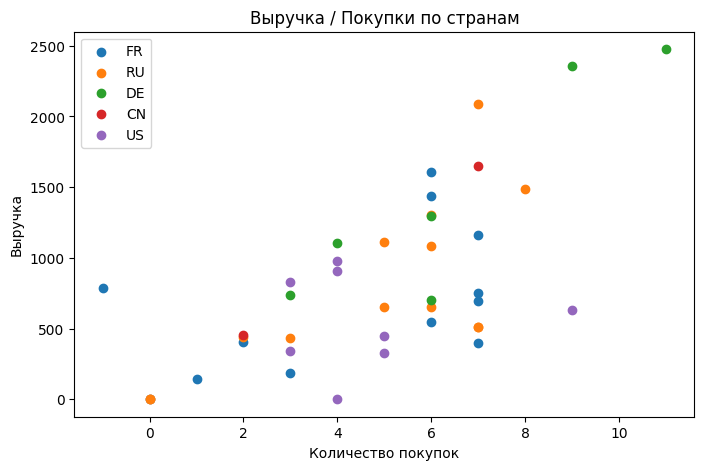

In [9]:
plt.figure(figsize=(8, 5))

for country in df1['country'].unique():
    mask = df1['country'] == country
    plt.scatter(df1.loc[mask, 'purchases'],
                df1.loc[mask, 'revenue'],
                label=country)

plt.title('Выручка / Покупки по странам')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.legend()
plt.savefig('figures/grafick3.png', dpi=300, bbox_inches='tight')   #сохраняю график в папку figures
plt.show()   #диаграмма рассеяния покупки / выручка